# Sounding Spirit Checklist Visualizations

The purpose of this notebook is to practice using Python to visualize patterns in the Checklist data. 

## Load libraries

In [ ]:
# The ``inline`` flag will use the appropriate backend to make figures appear inline in the notebook.  
%matplotlib inline

import pandas as pd
import numpy as np

# `plt` is an alias for the `matplotlib.pyplot` module
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# import seaborn library (wrapper of matplotlib)
import seaborn as sns

# import regular expressions to check date
import re

## Load and inspect data

In [ ]:
url = ('https://raw.githubusercontent.com/sounding-spirit/checklist-visualizations/main/dataverse_files/Checklist%20of%20Southern%20Sacred%20Music%20Imprints%2C%201850%E2%80%931925.csv')
df = pd.read_csv(url)

In [ ]:
df.head()

,Title,Responsibility,Associated Places,Publication,Manufacture,Distribution,Date,Approximate Date,Copyright,Edition/Imprint,Pagination,Height,Width,Denomination,Notation,Language,Content,1850-1925,After 1925,Before 1850,Broadside,Confederate Imprint,Convention Gospel,Denominational Publication,Dispersed Harmony,Distributor in South,Ethnographic,Female Author/Publisher,Fraternal Society,Gospel,Liturgical/Devotional Content,Missionary Use,Native Use,Non-White,Occasional,Out-of-Country Publisher,Out-of-Region Publisher,Revival Use,Scientific Music,Singing School Use,Still in Use,Sheet Music,Spirituals,Sunday School Use,Tract Society Publication,Attestations,Source for Record,Emory Holdings,MTSU Holdings,SBTS Holdings,UK Holdings,Notes
0,Timbrel : a collection of sacred music,"Baker, B. F.; Woodbury, I. B.","New York, NY; Boston, MA; Cincinnati, OH; St. ...",Huntington and Savage; W. J. Reynolds and Co.;...,NaN,NaN,1850,NaN,1848,NaN,?,?,oblong,NaN,?,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
1,"Sacred melodeon, The : containing a great vari...","Hayden, A. S.","Cincinnati, OH","Moore, Wilstach, Keys and Co.",NaN,NaN,1858,NaN,1849,NaN,?,?,oblong,NaN,?,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
2,"Sacred melodeon, The : containing a great vari...","Hayden, A. S.","Cincinnati, OH","Moore, Wilstach, Keys and Co.",NaN,NaN,1860,NaN,1849,NaN,?,?,oblong,NaN,?,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
3,"Sabbath school offering, or, true stories and ...","Martin, Mrs.; Summers, Thomas O.","Nashville, TN","Methodist Episcopal Church, South",E. Stevenson and F. A. Owen,NaN,1855,NaN,1854,NaN,?,?,NaN,"Methodist (MEC,S)",?,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN
4,Songs for the Sabbath school and vestry : desi...,"Williams, B. W.","Boston, MA; Chicago, IL; Cincinnati, OH",Henry Hoyt; William Tomlinson; George Crosby,NaN,NaN,1859,NaN,1858,NaN,?,?,oblong,NaN,?,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,MTSU,MTSU (local),NaN,Y,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2265 entries, 0 to 2264
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Title                          2265 non-null   object
 1   Responsibility                 2265 non-null   object
 2   Associated Places              2264 non-null   object
 3   Publication                    2259 non-null   object
 4   Manufacture                    218 non-null    object
 5   Distribution                   47 non-null     object
 6   Date                           2265 non-null   object
 7   Approximate Date               1102 non-null   object
 8   Copyright                      886 non-null    object
 9   Edition/Imprint                335 non-null    object
 10  Pagination                     2264 non-null   object
 11  Height                         2265 non-null   object
 12  Width                          378 non-null    object
 13  Den

## Histogram of Dates

Let's start with a simple histogram showing the number of volumes selected for each year.

In [ ]:
dates = df.loc[:, 'Date'].values

In [ ]:
dates

array(['1850', '1858', '1860', ..., '1898', '1907', '187?'], dtype=object)

Text(0.5, 0, 'Year')

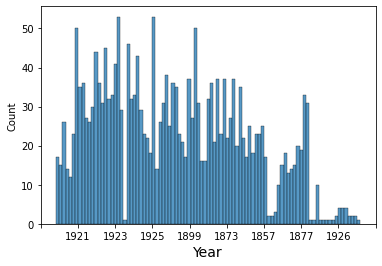

In [ ]:
p = sns.histplot(data=df, x="Date")
p.xaxis.set_major_locator(ticker.LinearLocator(10)) # Display every tenth label
plt.xlabel('Year', fontsize=14)

So there's a lot wrong with this plot. Obviously the dates are not all four-digit years and that causes problems. Can we clean the data and make a better plot?

In [ ]:
# Make a list of problem values
bad_dates = []
for value in np.unique(dates):
    if not re.match(r'^\d\d\d\d$', value):
        bad_dates.append(value)

# Replace problem values with None
df.loc[df['Date'].isin(bad_dates), 'Date'] = None

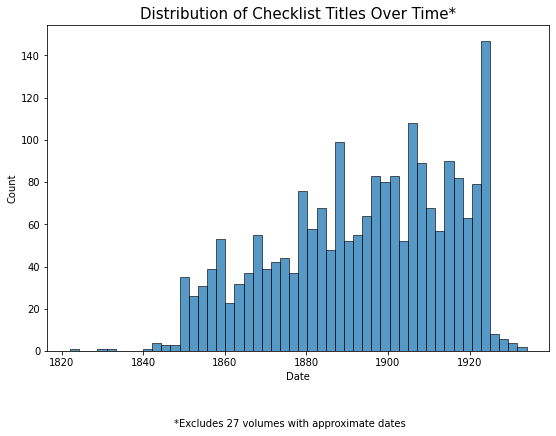

In [ ]:
dates = pd.to_numeric(df['Date'])
p = sns.histplot(dates, bins=50)
caption = '*Excludes 27 volumes with approximate dates'
plt.figtext(.5, -.05, caption, wrap=True, horizontalalignment='center', fontsize=10)
p.set_title('Distribution of Checklist Titles Over Time*', fontsize=15)
plt.tight_layout
fig = p.get_figure()
fig.set_size_inches(9,6)
#fig.savefig('plots/date_histogram.png', bbox_inches='tight')

In [ ]:
len(bad_dates)

27

## Non-English titles

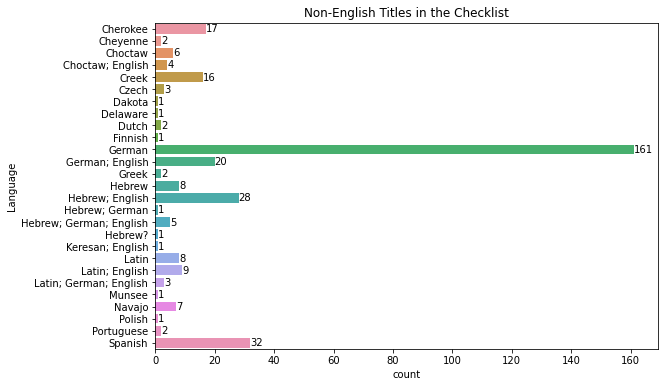

In [ ]:
non_english = df[df['Language'] != 'English']
ordered_languages = sorted(list(set(non_english['Language'])))
ax = sns.countplot(data=non_english, y='Language', order=ordered_languages)
for p in ax.patches:
  ax.annotate(p.get_width(), (p.get_width() + p.get_x(), p.get_y()+0.65))
ax.set_title('Non-English Titles in the Checklist')
fig = ax.get_figure()
fig.set_size_inches(9,6)



## Non-White titles

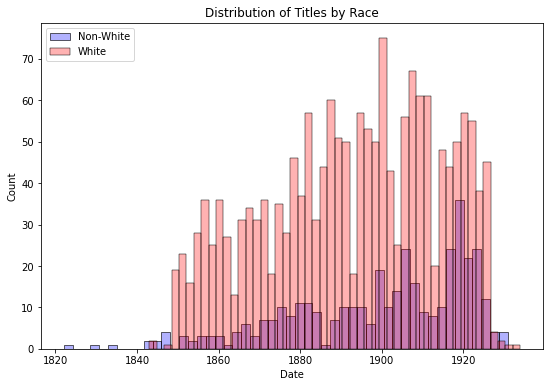

In [ ]:
nw = df[df['Non-White'] == 'Y']
w = df[df['Non-White'] != 'Y']
nw_dates = pd.to_numeric(nw['Date'])
w_dates = pd.to_numeric(w['Date'])
ax = sns.histplot(nw_dates, bins=50, alpha=0.3, label='Non-White', color='b')
ax = sns.histplot(w_dates, bins=50, alpha=0.3, label='White', color='r')
plt.legend(loc='upper left')
plt.title('Distribution of Titles by Race')
fig = ax.get_figure()
fig.set_size_inches(9,6)

How many Non-White titles had a female author or publisher?

In [ ]:
nw_women = df.loc[(df['Female Author/Publisher'] == 'Y') & (df['Non-White'] == 'Y')]
nw_women.shape[0]

49

Plot the distribution of Non-White tiltes with Female Author/Publisher

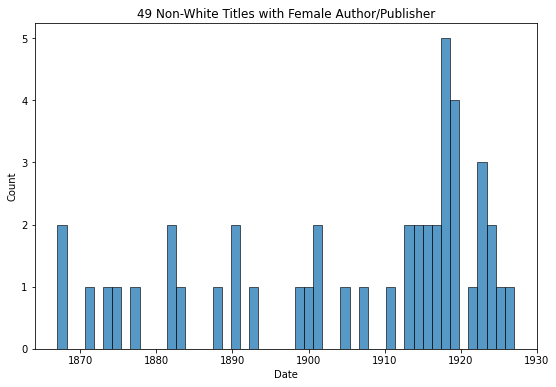

In [ ]:
nw_women_dates = pd.to_numeric(nw_women['Date'])
ax = sns.histplot(nw_women_dates, bins=50)
plt.title('49 Non-White Titles with Female Author/Publisher')
fig = ax.get_figure()
fig.set_size_inches(9,6)

What are those two titles before 1870?

In [ ]:
nw_women_old = nw_women[pd.to_numeric(nw_women['Date']) < 1870]
nw_women_old.head()

,Title,Responsibility,Associated Places,Publication,Manufacture,Distribution,Date,Approximate Date,Copyright,Edition/Imprint,Pagination,Height,Width,Denomination,Notation,Language,Content,1850-1925,After 1925,Before 1850,Broadside,Confederate Imprint,Convention Gospel,Denominational Publication,Dispersed Harmony,Distributor in South,Ethnographic,Female Author/Publisher,Fraternal Society,Gospel,Liturgical/Devotional Content,Missionary Use,Native Use,Non-White,Occasional,Out-of-Country Publisher,Out-of-Region Publisher,Revival Use,Scientific Music,Singing School Use,Still in Use,Sheet Music,Spirituals,Sunday School Use,Tract Society Publication,Attestations,Source for Record,Emory Holdings,MTSU Holdings,SBTS Holdings,UK Holdings,Notes
295,Hymns written for the use of Hebrew congregations,"Moise, Penina","Charleston, SC",Congregation Beth Elohim,NaN,NaN,1867,NaN,1856,"3rd ed., revised and corrected",214,16,NaN,Jewish (Western Sephardi/Reform),Nil,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,College of Charleston; Hebrew Union College-JI...,OCLC,NaN,NaN,NaN,NaN,NaN
1580,Slave songs of the United States,"Allen, William Francis; Ware, Charles Pickard;...","New York, NY",A. Simpson & Co.,NaN,NaN,1867,NaN,NaN,NaN,115,23,NaN,NaN,Round,English,Sacred,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,Y,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,NaN,MTSU; UK?,MTSU (OPAC),NaN,Y,NaN,Y,"UK catalog shows copy, but lacks holdings reco..."


## Styles of Notation



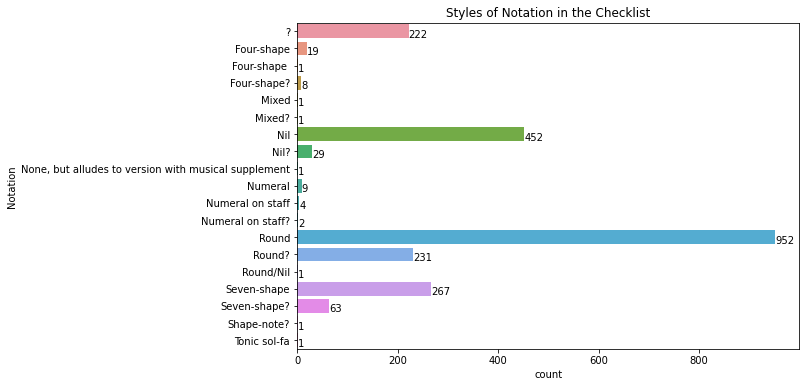

In [ ]:
ax = sns.countplot(data=df, y='Notation')
for p in ax.patches:
  ax.annotate(p.get_width(), (p.get_width() + p.get_x(), p.get_y()+0.75))
ax.set_title('Styles of Notation in the Checklist')
fig = ax.get_figure()
fig.set_size_inches(9, 6)

## Titles associated with Atlanta

In [ ]:
atl = df[df['Associated Places'].str.contains('Atlanta', na=False)]
atl.shape[0]

71

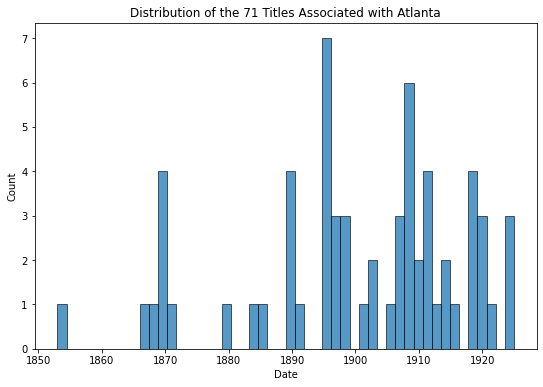

In [ ]:
atl_dates = pd.to_numeric(atl['Date'])
ax = sns.histplot(atl_dates, bins=50)
plt.title('Distribution of the 71 Titles Associated with Atlanta')
fig = ax.get_figure()
fig.set_size_inches(9,6)

## Content types

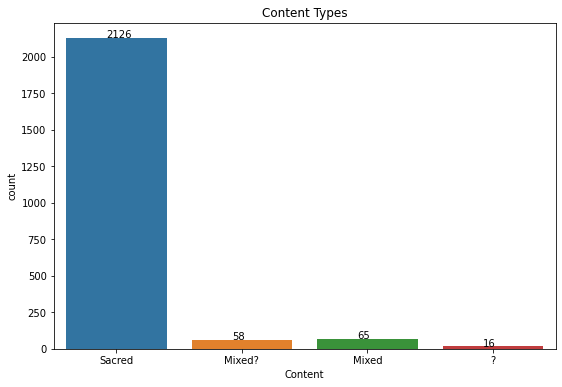

In [ ]:
ax=sns.countplot(data=df, x='Content')
for p in ax.patches:
  ax.annotate(p.get_height(), (p.get_x()+0.32, p.get_height()+3.5))
plt.title('Content Types')
fig = ax.get_figure()
fig.set_size_inches(9,6)